In [1]:
!git clone https://github.com/pwu-dev/deep-learning-project.git

Cloning into 'deep-learning-project'...
remote: Enumerating objects: 835, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 835 (delta 31), reused 182 (delta 16), pack-reused 602
Receiving objects: 100% (835/835), 827.94 MiB | 36.15 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Updating files: 100% (709/709), done.


Fonction de chargement des images

In [5]:
import os
import PIL
from PIL import Image
import numpy as np

def load_data(data_path, classes, image_size=64):

	num_images = 0
	for i in range(len(classes)):
		dirs = sorted(os.listdir(data_path + '/' + classes[i]))
		num_images += len(dirs)
                                
	x = np.zeros((num_images, image_size, image_size, 3))
	y = np.zeros((num_images, 1))
    
	current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
	for idx_class in range(len(classes)):
		dirs = sorted(os.listdir(data_path + '/' + classes[idx_class]))
		num_images += len(dirs)
    
        # Chargement des images, 
		for idx_img in range(len(dirs)):
			item = dirs[idx_img]
			if os.path.isfile(data_path + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
				img = Image.open(data_path + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
				img = img.convert('RGB')

                # Change la taille de l'image de telle façon à ce qu'elle soit un carré en remplissant les pixels manquant par du blanc
				x_size, y_size = img.size
				size = max(x_size, y_size)
				new_im = Image.new('RGB', (size, size), (255, 255, 255))
				new_im.paste(img, (int((size - x_size) / 2), int((size - y_size) / 2)))

                # Redimensionnement de l'image et écriture dans la variable de retour x 
				img = new_im.resize((image_size,image_size))
				x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
				y[current_index] = idx_class
				current_index += 1

	return x, y

Variables utiles

In [47]:
path = "./deep-learning-project/dataset/"
CLASSES = ["beurre", "cremes-dessert", "eaux", "fromages", "haricots-verts", 
           "huiles-cuisson", "jus-fruits", "lait", "mais", "oeufs", 
           "pates", "petits-pois", "poissons", "riz", "sodas", 
           "soupes", "viandes-rouges", "volailles", "yaourts-laitiers"]

CLASSES = ["poissons", "sodas", "viandes-rouges"]
IMAGE_SIZE = 128

Chargement des images

In [48]:
x_total, y_total = load_data(path, CLASSES, image_size=IMAGE_SIZE)

percent = int(len(y_total)/100)

x_training, x_validation, x_test = x_total[:90*percent,:], x_total[90*percent:,:], x_total[90*percent:,:]
y_training, y_validation, y_test = y_total[:90*percent,:], y_total[90*percent:,:], y_total[90*percent:,:]

Création du model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(96, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(len(CLASSES), activation="softmax"))

model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 96)        

Entrainement du réseau

In [34]:
history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=10, batch_size=10)

Epoch 1/10
27/27 [==============================] - 3s 21ms/step - loss: 10.7158 - accuracy: 0.2630 - val_loss: 8.8601 - val_accuracy: 0.0676
Epoch 2/10
27/27 [==============================] - 0s 10ms/step - loss: 1.5247 - accuracy: 0.4667 - val_loss: 8.5424 - val_accuracy: 0.0541
Epoch 3/10
27/27 [==============================] - 0s 10ms/step - loss: 0.8694 - accuracy: 0.6556 - val_loss: 8.8045 - val_accuracy: 0.2162
Epoch 4/10
27/27 [==============================] - 0s 9ms/step - loss: 0.6956 - accuracy: 0.7519 - val_loss: 8.7583 - val_accuracy: 0.0405
Epoch 5/10
27/27 [==============================] - 0s 9ms/step - loss: 0.5151 - accuracy: 0.8296 - val_loss: 8.1567 - val_accuracy: 0.0811
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: 0.4257 - accuracy: 0.8444 - val_loss: 7.6208 - val_accuracy: 0.1757
Epoch 7/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3386 - accuracy: 0.8852 - val_loss: 9.0373 - val_accuracy: 0.1486
Epoch 8/10
27/27

In [15]:
import matplotlib.pyplot as plt

def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

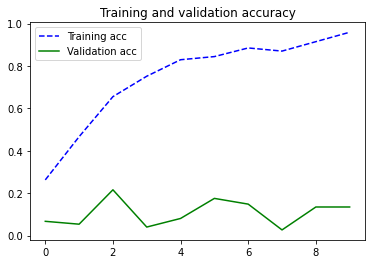

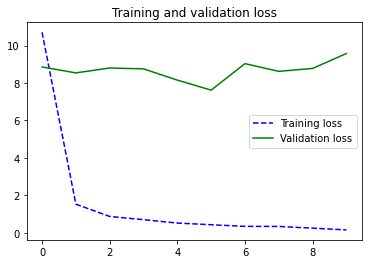

In [35]:
plot_training_analysis()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(96, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(len(CLASSES), activation="softmax"))

model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 96)        55392     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 96)      

Epoch 1/50
9/9 [==============================] - 4s 95ms/step - loss: 58.2235 - accuracy: 0.3333 - val_loss: 12.6071 - val_accuracy: 0.4833
Epoch 2/50
9/9 [==============================] - 0s 42ms/step - loss: 2.2465 - accuracy: 0.5556 - val_loss: 7.4180 - val_accuracy: 0.8500
Epoch 3/50
9/9 [==============================] - 0s 42ms/step - loss: 1.2149 - accuracy: 0.5444 - val_loss: 7.2461 - val_accuracy: 0.6833
Epoch 4/50
9/9 [==============================] - 0s 43ms/step - loss: 0.4644 - accuracy: 0.6667 - val_loss: 7.2952 - val_accuracy: 0.5667
Epoch 5/50
9/9 [==============================] - 0s 42ms/step - loss: 0.3034 - accuracy: 0.5111 - val_loss: 7.8355 - val_accuracy: 0.7167
Epoch 6/50
9/9 [==============================] - 0s 43ms/step - loss: 0.2170 - accuracy: 0.6000 - val_loss: 7.2613 - val_accuracy: 0.6000
Epoch 7/50
9/9 [==============================] - 0s 43ms/step - loss: 0.1577 - accuracy: 0.5778 - val_loss: 8.2795 - val_accuracy: 0.6167
Epoch 8/50
9/9 [=========

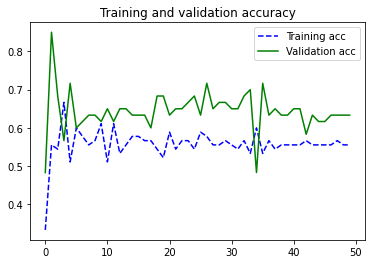

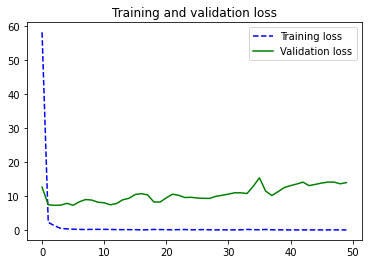

In [50]:
history = model.fit(train_datagen.flow(x_training, y_training, batch_size=10), validation_data=(x_validation, y_validation), epochs=50)
plot_training_analysis()

In [51]:
sortie = model(np.expand_dims(x_validation[0], 0))
print(sortie)
print(np.argmax(sortie))
print(y_validation[0])

tf.Tensor([[1.0600694e-15 1.0000000e+00 3.2508043e-21]], shape=(1, 3), dtype=float32)
1
[1.]
